In [15]:
import gym
import numpy as np
import matplotlib.pyplot as plt

from tqdm import tqdm

%matplotlib inline

## Q-Learning

In [22]:
env = gym.make('FrozenLake-v0')
# STATES ALREADY DISCRETE SO OBERVATION = STATE

In [27]:
class Agent:
    def __init__(self, n_states, n_actions, gamma, alpha, epsilon, epsilon_min, epsilon_decay):
        self.n_states = n_states
        self.n_actions = n_actions
        self.GAMMA = gamma
        self.ALPHA = alpha
        self.EPSILON = epsilon
        self.epsilon_min = epsilon_min 
        self.epsilon_decay = epsilon_decay
        self.Q = np.zeros((n_states, n_actions))

    # e-GREEDY POLICY
    def get_action(self, state, greedy=False):
        if( (np.random.uniform() >= self.EPSILON) or greedy):
            action = np.argmax(self.Q[state])
        else:
            action = env.action_space.sample()
        return action
    
    # Q-Learning
    def update_q(self, state, action, reward, state_):
        actionMAX_ = np.argmax(self.Q[state_])
        qMAX_ = self.Q[state_ ,actionMAX_]
        self.Q[state, action] += (self.ALPHA * (reward + (self.GAMMA * qMAX_) - self.Q[state, action]))
        
        self.decay_epsilon()

    def decay_epsilon(self):
        if(self.EPSILON > self.epsilon_min):
            self.EPSILON = self.EPSILON * self.epsilon_decay
        else:
            self.EPSILON = self.epsilon_min 

In [28]:
def play_episode(agent):
    total_moves = 0
    total_reward = 0

    done = False
    state = env.reset()
    
    while not done:
        # e-GREEDY
        action = agent.get_action(state)
        state_ , reward, done, _ = env.step(action)

        total_moves += 1
        total_reward += reward

        # Q-Learning update
        agent.update_q(state, action, reward, state_)

        state = state_

    return (round(total_reward), round(total_moves))

In [32]:
# INIT

NUM_EPISODES = 500000

agent = Agent(n_states = env.observation_space.n,
              n_actions = env.action_space.n,
              gamma = 0.9,
              alpha = 0.001,
              epsilon = 1.0,
              epsilon_min = 0.01,
              epsilon_decay=0.9999995)

In [33]:
# TRAINING
episode_rewards = []
episode_lengths = []
mean_rewards = [] # MEAN REWARD OF LAST 100 GAMES

for episode_n in (range(NUM_EPISODES)):

    episode_reward, episode_length = play_episode(agent)
    episode_rewards.append(episode_reward)
    episode_lengths.append(episode_length)

    if((episode_n + 1)%1000 == 0):
        mean_reward = np.mean(episode_rewards[-100:])
        mean_rewards.append(mean_reward)
        print(" ITER: ",(episode_n),"\tMEAN_RWD: ",mean_reward ,"\tLEN: ",episode_length,"\tEPS: ",round(agent.EPSILON,3))

0.42 	EPSILON:  0.08299577118708583
100%|██████████| 500000/500000 [07:56<00:00, 1048.91it/s] ITER:  499999 	MEAN_REWARD:  0.66 	EPSILON:  0.01



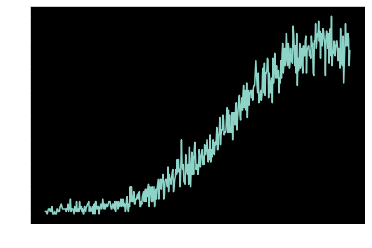

In [34]:
# PLOT REWARDS CURVE
plt.plot(mean_rewards)

## Analyze environment / Post training

In [35]:
N_GAMES = 10000
eval_rewards = []
mean_eval_rewards = []

for game in tqdm(range(N_GAMES)):
    total_reward = 0

    done = False
    state = env.reset()
    
    while not done:
        # e-GREEDY
        action = agent.get_action(state, greedy=True)
        state_ , reward, done, _ = env.step(action)
        total_reward += reward
        state = state_

    eval_rewards.append(total_reward)
        
    if((game + 1)%100 == 0):
        mean_eval_reward = np.mean(eval_rewards[-100:])
        mean_eval_rewards.append(mean_eval_reward)

100%|██████████| 10000/10000 [00:11<00:00, 894.85it/s]


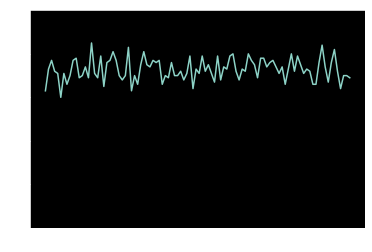

In [38]:
plt.ylim((0,1))
plt.plot(np.arange(len(mean_eval_rewards)),mean_eval_rewards)